### imports

In [106]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
import os

### Read csv

In [107]:
df = pd.read_csv("Latest Covid-19 India Status.csv")
df.head()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
0,Andaman and Nicobar,10747,0,10618,129,0.0,98.80,1.20,100896618
1,Andhra Pradesh,2339078,7,2324338,14733,0.0,99.37,0.63,128500364
2,Arunachal Pradesh,66891,0,66595,296,0.0,99.56,0.44,658019
3,Assam,746100,0,738065,8035,0.0,98.92,1.08,290492
4,Bihar,851404,1,839100,12303,0.0,98.55,1.45,40100376


In [108]:
df.shape
df.columns

Index(['State/UTs', 'Total Cases', 'Active', 'Discharged', 'Deaths',
       'Active Ratio', 'Discharge Ratio', 'Death Ratio', 'Population'],
      dtype='object')

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State/UTs        36 non-null     object 
 1   Total Cases      36 non-null     int64  
 2   Active           36 non-null     int64  
 3   Discharged       36 non-null     int64  
 4   Deaths           36 non-null     int64  
 5   Active Ratio     36 non-null     float64
 6   Discharge Ratio  36 non-null     float64
 7   Death Ratio      36 non-null     float64
 8   Population       36 non-null     int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 2.7+ KB


In [110]:
df.describe()

,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
count,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000,3.600000e+01
mean,1.241145e+06,56.527778,1.226346e+06,14742.388889,0.002222,98.893333,1.103889,3.971861e+07
std,1.834031e+06,215.847762,1.808252e+06,27170.089767,0.007601,0.498764,0.498479,5.050913e+07
min,1.074700e+04,0.000000,1.061800e+04,4.000000,0.000000,97.540000,0.030000,6.600100e+04
25%,1.058650e+05,0.000000,1.048640e+05,1120.750000,0.000000,98.672500,0.842500,1.695473e+06
50%,6.127720e+05,7.500000,6.063570e+05,6542.000000,0.000000,98.925000,1.070000,2.410088e+07
75%,1.320822e+06,27.500000,1.311256e+06,14292.750000,0.000000,99.150000,1.327500,6.979986e+07
max,8.136945e+06,1300.000000,7.988392e+06,148419.000000,0.040000,99.970000,2.460000,2.315026e+08


In [111]:
#df.isnull() -> shws booleen values 
#df.isnull().sum() -> keep add count of null of that row
df.isnull().sum()

State/UTs          0
Total Cases        0
Active             0
Discharged         0
Deaths             0
Active Ratio       0
Discharge Ratio    0
Death Ratio        0
Population         0
dtype: int64

In [112]:
df['State/UTs'].unique()#states

df['State/UTs'].nunique()#count

36

In [113]:
states=df["State/UTs"].tolist()


### min & max number of deaths

In [114]:
df['Deaths'].max()

df['Deaths'].min()

df[df['Deaths']==148419]

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
20,Maharashtra,8136945,134,7988392,148419,0.0,98.17,1.82,399001


### state with hightest death & lowest deaths

In [115]:
df[['State/UTs','Deaths']].sort_values(by="Deaths",ascending=False)[:5]


,State/UTs,Deaths
20,Maharashtra,148419
16,Kerala,71570
15,Karnataka,40308
30,Tamil Nadu,38049
8,Delhi,26522


In [116]:
df.sort_values(by="Deaths",ascending=False)[:5]['Population']

20      399001
16    91702478
15     1711947
30    35998752
8       773997
Name: Population, dtype: int64

In [117]:
df.sort_values(by="Deaths",ascending=False)[:5]

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
20,Maharashtra,8136945,134,7988392,148419,0.00,98.17,1.82,399001
16,Kerala,6829249,1300,6756379,71570,0.02,98.93,1.05,91702478
15,Karnataka,4072536,123,4032105,40308,0.00,99.01,0.99,1711947
30,Tamil Nadu,3594573,58,3556466,38049,0.00,98.94,1.06,35998752
8,Delhi,2007313,10,1980781,26522,0.00,98.68,1.32,773997


### plot states vs no of death

In [118]:
x=df[['State/UTs','Deaths']].sort_values(by="Deaths",ascending=False)['State/UTs'][:10].values
y=df[['State/UTs','Deaths']].sort_values(by="Deaths",ascending=False)['Deaths'][:10].values

df1=pd.DataFrame({'State/UTs':x,'Deaths':y})
fig=px.bar(df1,
          x='State/UTs',
          y='Deaths',
          color='State/UTs',
          title='states vs No.of deaths')

fig.show()


In [119]:
df['Active']#.tolist()]
df['Active'].values#.tolist()]

array([   0,    7,    0,    0,    1,    3,    8,    0,   10,   15,   11,
         38,   14,   10,    0,  123, 1300,    1,    0,    2,  134,    0,
          1,    0,    0,   84,   73,   29,    5,    2,   58,   27,    0,
         18,   11,   50], dtype=int64)

In [120]:
df[['Active']].values

array([[   0],
       [   7],
       [   0],
       [   0],
       [   1],
       [   3],
       [   8],
       [   0],
       [  10],
       [  15],
       [  11],
       [  38],
       [  14],
       [  10],
       [   0],
       [ 123],
       [1300],
       [   1],
       [   0],
       [   2],
       [ 134],
       [   0],
       [   1],
       [   0],
       [   0],
       [  84],
       [  73],
       [  29],
       [   5],
       [   2],
       [  58],
       [  27],
       [   0],
       [  18],
       [  11],
       [  50]], dtype=int64)

### TOP 10 STATES WITH HIGHEST NUMBER OF ACTIVE CASES

In [121]:
x=df[['State/UTs','Active']].sort_values(by = 'Active',ascending=False)[:10]['State/UTs'].values

y=df[['State/UTs','Active']].sort_values(by = 'Active',ascending=False)[:10]['Active'].values

df1 = pd.DataFrame({'State/UTs':x,
                  'Active Cases':y })
fig = px.pie(df1, 
             names='State/UTs', 
             values='Active Cases',
             color='State/UTs',
             title='State/UTs Vs No. of Active Cases',
             hole=0.3,
             height = 800,
             width = 800
            )
fig.update_traces(textposition='outside', textinfo='value+label',
            pull=[0,0.1,0.2,0.3,0.4,0.1,0.2,0.1,0.1,0.3] )
fig.show()

In [122]:
x = df[['State/UTs','Active']].sort_values(by = 'Active',ascending=False)[:10]['State/UTs'].values
y = df[['State/UTs','Active']].sort_values(by = 'Active',ascending=False)[:10]['Active'].values

df1 = pd.DataFrame({'State/UTs':x,
                  'Active Cases':y })

fig = px.scatter(df1, 
             x='State/UTs', 
             y='Active Cases',
             color='State/UTs',
             title='State/UTs Vs No. of Active Cases',
                 size='Active Cases'
            )
fig.show()

### Top 10 States with Highest Number of Discharged Patients

In [123]:
x = df[['State/UTs','Discharged']].sort_values(by = 'Discharged',ascending=False)[:10]['State/UTs'].values
y = df[['State/UTs','Discharged']].sort_values(by = 'Discharged',ascending=False)[:10]['Discharged'].values

df1 = pd.DataFrame({'State/UTs':x,
                  'Discharged':y })
fig = px.pie(df1, 
             names='State/UTs', 
             values='Discharged',
             color='State/UTs',
             title='State/UTs Vs No. of Discharged',
             hole=0.3,
             height = 800,
             width = 800
            )
fig.update_traces(textposition='outside', textinfo='value+label',
            pull=[0,0.1,0.2,0.3,0.4,0.1,0.2,0.1,0.1,0.3] )
fig.show()


### **Active Cases is comparatively very less than Total cases or discharged

In [124]:
x = df['State/UTs'].values
y1 = df['Total Cases'].values
y2 = df['Active'].values


fig= go.Figure()

fig.add_trace(go.Scatter(x=x, y=y1, name= "Total"))
fig.add_trace(go.Scatter(x=x, y=y2, name= "Active"))

fig.show()

In [125]:
covidI= df
x = covidI['State/UTs'].values
y1 = covidI[['State/UTs','Total Cases']]['Total Cases'].values
y2 = covidI[['State/UTs','Deaths']]['Deaths'].values
y3 = covidI[['State/UTs','Discharged']]['Discharged'].values

fig= go.Figure()

fig.add_trace(go.Bar(x=x, y=y1, name= "Total"))
fig.add_trace(go.Bar(x=x, y=y2, name= "Deaths"))
fig.add_trace(go.Bar(x=x, y=y3, name= "Discharged"))

fig.update_layout(
    height = 900,
    margin=dict(l=0, r=0, t=0, b=0)
    #paper_bgcolor="lightgrey",
)
fig.show()

In [126]:
fig = px.line(covidI, x=covidI['State/UTs'].values, y=covidI.columns[3:5], height = 800,width=1000)
fig.show()

In [127]:
px.histogram(covidI['Death Ratio'])

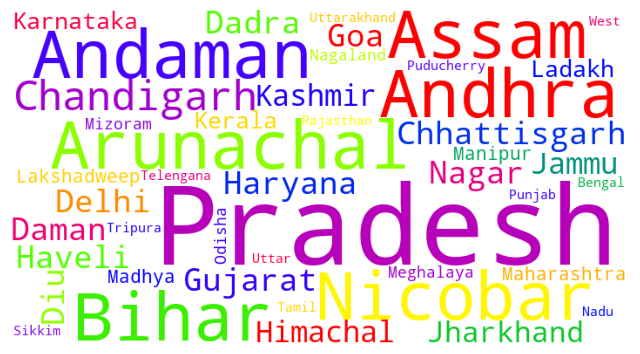

In [128]:
x= covidI['State/UTs'].values

plt.subplots(figsize = (8,8))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 712,
                    height = 384,
                    colormap = 'prism'    ).generate(' '.join(x))
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.savefig('Plotly-World_Cloud.png')
plt.show()

In [129]:
# Horizontal Bar graph States versus Death Ratio (using plotly)
x = covidI['State/UTs'].values
y = covidI['Death Ratio'].values

df = pd.DataFrame({'State/UTs':x,
                  'Death Ratio':y })

fig = px.bar(df, 
             x='Death Ratio', 
             y='State/UTs',
             color='State/UTs', #color represents State/UTs
             title='State/UTs versus Death Ratio',
             orientation='h',
             height = 1000
            )
fig.show()